# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Hyper link
* [Q1](#Q1)
* [Q2](#Q2)
* [Q3](#Q3)
* [Q4](#Q4)
* [Q5](#Q5)
* [Q6](#Q6)
* [Q7](#Q7)
* [Q8](#Q8)
* [Q9](#Q9)

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [4]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

<a id="Q1"></a>
### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

In [1]:
# run python script via bash in jupyter notebook directly
%run -i 'smartcab/agent_Q1.py'


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.63)
Agent not enforced to meet deadline.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.86)
Agent not enforced to meet deadline.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.31)
Agent not enforced to meet deadline.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.63)
Agent not enforced to meet deadline.

/-------------------
| Step 4 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2

**Answer:**<br/>
It seems the agent doesn't move at all. When there is green light, however, the agent doesn't react accordingly, so it receives negative reward(punishment). On the other hand, when there is red light, and the agent stops (basically it doesn't move at all), then it receives positive reward. In short, for this case, the agent seems not moving at all. The reward basically is indifferent to it.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

<a id="Q2"></a>
### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
1. For `agent.py`, **learning, epsilon, alpha** are three flags we can have customized set-up. For **learning**, it means to initiate the agent to start learning. For **epsilon**, it determines the propensity for the agent trying new actions/paths. For **alpha**, it determines the speed for the agent to adjust to the feedback from previous action/reward.
2. For `environment.py`, the class **Environment** is called for the agent to act upon.
3. For `simulator.py`, which mainly controls the visulization and messaging of the simulation. The **render_text()** function is defined to display the simulation result right on the terminal window. On the other hand, the **render()** function is defined to display it on GUI interface.
4. For `planner.py`, the `next_waypoint()` function will consider to move **East-West** direction fist, then **North-South**. 

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


In [1]:
%run -i 'smartcab/agent_Q3.py'


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 2.52)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.76)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.57)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.41)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\---


/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 1.33)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 0.39)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.87)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.08)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 3
\-------------------------

Simulating 

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.32)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.05)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -5.93)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 0.66)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 0.80)
12% of time remaining to reach destination.

/-------------------
| Step 22


/-------------------
| Step 13 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.62)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.09)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.46)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.61)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -5.64)
40% of time remaining to reach d


/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.10)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 1.54)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.09)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 0.29)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.77)
65% of time remaining to reach destination.

/-------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.12)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint forward. (rewarded 2.29)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.53)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of forward. (rewarded 0.50)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 1.19)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent attempt


/-------------------
| Step 13 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 1.15)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.04)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 0.32)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 0.88)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.45)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\---


/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.17)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 1.33)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.87)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.88)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 2.29)
63% of time remaining to reach destination.

/---------

\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 1.29)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 0.63)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.54)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 0.84)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.14)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

!! Ag

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.72)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of forward. (rewarded 0.90)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded 1.43)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.90)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.06)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!


/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.47)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint forward. (rewarded 2.94)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint forward. (rewarded 1.09)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 2.59)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.80)
80% of time remaining to reach destination.

/---------


/-------------------
| Step 12 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 1.42)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.08)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.51)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.86)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light 


/-------------------
| Step 12 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.44)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded 1.61)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -5.75)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of forward. (rewarded 1.48)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.47)
32% of time remaining to reach destination.

/--------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -5.42)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.16)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 0.03)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.77)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 0.79)
40% of time remaining to reach destination.

/-------------------
| Ste


/-------------------
| Step 26 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.71)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.00)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.51)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.48)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Testing trial 7
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| 


/-------------------
| Step 23 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 0.61)
4% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 9
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.06)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 1.05)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.91)
85% of time remaining to reach destination.

/-------------

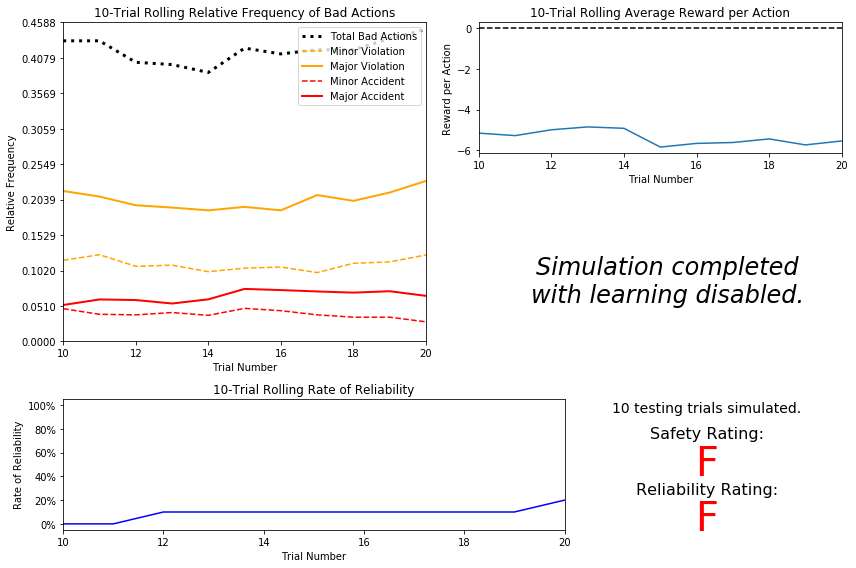

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

<a id="Q3"></a>
### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
1. Around 0.4 to 0.5 possibilitiy to commit bad decisions, and averagely 0.05 possibility to cause major accidents.
2. No! As the agent reacts randomly, the **Chart of Rate of Reliability** should send us the message that if the agent react randomly, basically it's going to be super unreliable, as we see the rate of reliability is close to **0**.
3. The chart on upper-right reveals that the agent is now being punished heavily. For all trials receive great **negative reward** averagely.
4. No, the outcome **remains the same** throughout the whole training.
5. This smartcab gets the grade **F** on both safety and reliability, which means it is super unreliable and unsafe, and hence it should not be used.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

<a id="Q4"></a>
### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**<br/>
I will choose **waypoint, inputs-light, inputs-left, inputs-oncoming**. For `safety`, the *light, left, oncoming* information are used to define if violation occurs. On the other hand, for `efficiency`, the *waypoint* will be used, so that the cab can assess how far away it is from the final destination.

The **input-right** doesn't affect how the cab behavior, for it doesn't occur any violations. And assuming the cab will try to reach the destination as soon as possible, **deadline** records of how many actions the cab can take may not be influential anyway.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

<a id="Q5"></a>
### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**<br/>
For **waypoint,light,left,oncoming**, the respective states are 4(left,right,forward,none)x2(green,red)x4(left,right,forward,none)x4(left,right,forward,none). Hence, **128** states in total. The number of possible states are not enormously big, and hence, the agent should be able to learn the optimal policy.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [5]:
%run -i 'smartcab/agent_Q6.py'


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.27)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.49)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.51)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.65)
80% of

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 0.91)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.78)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.36)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.28)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('rig


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 5
\-------------------------

Simulating trial. . . 
epsilon = 0.7500; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.38)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent followed the waypoint right. (rewarded 2.15)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.65)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.66)
80% of time remaining to


/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.65)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove left instead of right. (rewarded 1.48)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 0.29)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -9.22)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right in


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.21)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -10.82)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.52)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.10)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', N


Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded -0.69)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.66)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 10
\-------------------------

Simulating trial. . . 
epsilon = 0.5000; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent drove right instead of forward. (rewarded 0.32)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent drove right instead of left. (rewarded 0.40)
92% of time remaining to reach destination.

/-------------------
|


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded -0.02)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.77)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.57)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 0.78)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rew


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.19)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.25)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent drove right instead of left. (rewarded 0.98)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.43)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent properly idled at a red light. (reward

| Step 21 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.61)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.84)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.26)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 1.03)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent 

| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.69)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.99)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded -0.12)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove left instead of right. (rewarded -0.17)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewar


/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 2.93)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.26)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 1.35)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent followed the waypoint right. (rewarded 1.71)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. 

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'forward')
Agent drove right instead of left. (rewarded 1.09)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent drove right instead of forward. (rewarded 1.00)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.99)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.93)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'green', N


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 1.71)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded -0.04)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.95)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove right instead of forward. (rewarded -0.22)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent drove right 


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 1.54)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.55)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.67)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.43)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent drove right instead of forward. (rewarded 1.24)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.80)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.33)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 1.89)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'right')
Agent drove right instead of forw


/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded -0.06)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'forward')
Agent followed the waypoint right. (rewarded 1.67)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.44)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded -0.42)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', 'ri


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.64)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.18)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 0.76)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent drove right instead of forward. (rewarded 0.53)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agent drove right instead of left. 

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.55)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.72)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded -0.33)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.89)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Testing trial 9
\-----------


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.87)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None)
Agent followed the waypoint right. (rewarded 2.79)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.53)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.16)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent drove right instead of left. (rewarded 1

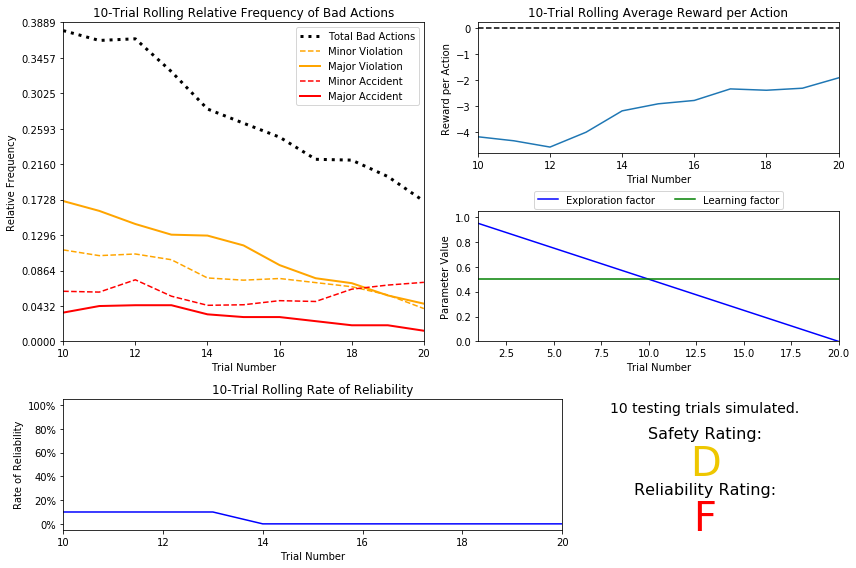

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

<a id="Q6"></a>
### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
1. Compared to the basic driving agent, the default Q-learning agent also has **low performance on rate of reliability**, as they both get grade **F**.
2. **20** training trials are required before testing the agent, irrelevant to if the epsilon reaches the tolerance. Given the default value of epsilon-tolerance is 0.05, and the epsilon starts from 1 and gradually decays to 0.05. Thus 1 is divided by 0.05, we get the training number for 20, same as the minimal requirement.
3. Yes, as in the parameter panel, the epsilon decays for every new training trial.
4. Yes, as the training trials increase, we see the trend for decreasing number of bad actions and increasing value of reward per action.
5. The grade for safety improves from F to D, while the rate of reliability remains the same.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [33]:
%run -i "smartcab/agent_Q7.py"


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
epsilon = 0.9990; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.05)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.69)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.60)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded 0.69)
84% of time remaining to reach destination


/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.71)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.52)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent drove right instead of forward. (rewarded -0.07)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded 0.93)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'forward')
A

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.11)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 4
\-------------------------

Simulating trial. . . 
epsilon = 0.9960; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.78)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove right instead of forward. (rewarded 1.32)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green


/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.06)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 0.30)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.70)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded -0.06)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'fo


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.89)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.22)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent drove right instead of forward. (rewarded 1.22)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -9.59)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent i


Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded -0.11)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'forward')
Agent followed the waypoint right. (rewarded 1.39)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.98)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.95)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agent followed the waypoint left. (rewarded 1.24)
48% of time remaining to reach de

Agent attempted driving forward through a red light. (rewarded -10.93)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.87)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 1.38)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.61)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 1.84)
75% of time remaining to reach destination.

/--------


/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded -0.14)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 12
\-------------------------

Simulating trial. . . 
epsilon = 0.9880; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.32)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.14)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Age


/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded 1.01)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.18)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded -0.63)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.45)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 14
\----------------------


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent attempted driving left through a red light. (rewarded -9.68)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.12)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.12)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 1.18)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------




/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.27)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.04)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.09)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.16)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent 

| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent attempted driving left through a red light. (rewarded -10.31)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 1.06)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.87)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.88)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\---------

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent drove right instead of left. (rewarded 0.71)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 2.52)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent drove left instead of right. (rewarded 0.20)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.97)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving 


/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -9.20)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.09)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.51)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent attempted driving forward through a red light. (rewarded -10.10)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.92)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.09)
94% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.06)
91% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 2.79)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove righ


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.62)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove forward instead of left. (rewarded 1.51)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.85)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 0.04)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 


/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.63)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.14)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 0.70)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.34)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\--


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.21)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.61)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent attempted driving left through a red light. (rewarded -10.03)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.86)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous sta


/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 2.16)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.12)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -9.76)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.64)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('right', 'r


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.87)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -5.20)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.34)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent followed the waypoint forward. (rewarded 1.62)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 

| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -9.95)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.58)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.68)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.69)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarde

/-------------------------
| Training trial 34
\-------------------------

Simulating trial. . . 
epsilon = 0.9660; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.03)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.48)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -9.41)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.43)
87% of time remaining to reach destination.

/-

| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 1.77)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.26)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 2.62)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'left')
Agent drove left instead of right. (rewarded 1.49)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', None, '

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.92)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.46)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.38)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.69)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous

| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.97)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 1.03)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.34)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.56)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.


/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent drove left instead of forward. (rewarded 1.41)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.24)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.08)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -10.97)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\----------------


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded 1.53)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 0.18)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -10.52)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.26)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving 

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.71)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.43)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.47)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.26)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.61)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.07)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.40)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.41)
50% of time remaining to reach destination.

/----------

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.95)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.62)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.80)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.83)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red',

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.84)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 49
\-------------------------

Simulating trial. . . 
epsilon = 0.9510; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent attempted driving forward through a red light. (rewarded -9.48)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -9.61)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at 

\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.16)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 1.32)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.73)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None)
Agent followed the waypoint right. (rewarded 1.33)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewa


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.65)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.65)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove right instead of forward. (rewarded 0.29)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.18)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', Non

| Step 18 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove left instead of right. (rewarded 0.04)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.91)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.72)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.70)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent foll


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent attempted driving forward through a red light. (rewarded -10.27)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.17)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.12)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.28)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\----------------


/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 0.16)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded -0.58)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.45)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove forward instead of right. (rewarded -0.50)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training tri


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -4.60)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.52)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 1.31)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.49)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving 

\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.60)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.29)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.03)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 0.78)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (

| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.91)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 1.42)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.63)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.38)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', No


Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.69)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.54)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.96)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.05)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.29)
10% of time remai


/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.82)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent followed the waypoint left. (rewarded 2.62)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.55)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.28)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', No


/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.78)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.23)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded -0.27)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.81)
13% of time remaining to reach destination.

/-----

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.56)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.81)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 0.29)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.42)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent 


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.47)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.59)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.87)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'forward')
Agent followed the waypoint right. (rewarded 1.39)
44% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 71
\-------------------------



Agent previous state: ('right', 'green', None, 'left')
Agent drove forward instead of right. (rewarded 0.31)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.59)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.49)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.24)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 2.31)
75%

| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.24)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.01)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 0.56)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.76)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward'


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.91)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.24)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.90)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent followed the waypoint left. (rewarded 1.12)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoi

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.23)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 1.44)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.63)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove left instead of forward. (rewarded 0.24)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', N

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.44)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.35)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agent followed the waypoint left. (rewarded 2.27)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.36)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('forward', 'r


/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.93)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.75)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.71)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent drove right instead of forward. (rewarded 1.08)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent fol


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -10.04)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.95)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent attempted driving left through a red light. (rewarded -9.52)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.00)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove


Agent previous state: ('left', 'green', 'forward', 'forward')
Agent drove forward instead of left. (rewarded -0.33)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'left')
Agent followed the waypoint left. (rewarded 1.25)
5% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 85
\-------------------------

Simulating trial. . . 
epsilon = 0.9150; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 1.30)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 0.44)
90% of time remaining to reach destination.

/-------------------
| 

\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent drove right instead of forward. (rewarded -0.20)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.27)
32% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 87
\-------------------------

Simulating trial. . . 
epsilon = 0.9130; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.61)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.44)
92% of time remaining to reach destination.

/-------

| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 0.31)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.68)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.82)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent drove right instead of forward. (rewarded 0.30)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove forward instead of left. (rewarded

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 1.65)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove forward instead of right. (rewarded 1.04)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.77)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded -0.14)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green'

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent drove right instead of left. (rewarded 1.13)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.78)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 0.59)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.37)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
A

Agent previous state: ('right', 'green', 'forward', 'right')
Agent drove forward instead of right. (rewarded 0.50)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.01)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 95
\-------------------------

Simulating trial. . . 
epsilon = 0.9050; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.02)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.89


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded 0.52)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent attempted driving left through a red light. (rewarded -9.61)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left')
Agent drove left instead of right. (rewarded 0.31)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.37)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right ins


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.94)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.51)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.02)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.71)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent fol


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.70)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.48)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.30)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.01)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent pre

| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.74)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.59)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 1.81)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent followed the waypoint right. (rewarded 0.79)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a m


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.69)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.11)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 104
\-------------------------

Simulating trial. . . 
epsilon = 0.8960; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.08)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward throug


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.99)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded 0.41)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 1.09)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.97)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.45)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.63)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove right instead of forward. (rewarded -0.11)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.81)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.86)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -10.33)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'right')
Agent attempted driving forward through a red light. (rewarded -9.44)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.28)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent 


/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 0.94)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'right')
Agent attempted driving forward through a red light. (rewarded -10.40)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.59)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.12)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'l

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.53)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent drove right instead of left. (rewarded 1.37)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.18)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.12)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Age

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.67)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.17)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent drove left instead of right. (rewarded 1.41)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 0.96)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous stat

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.91)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded -0.10)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.10)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.06)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'r

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 1.98)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent drove left instead of forward. (rewarded 1.59)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 0.80)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.17)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Age

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove right instead of forward. (rewarded 1.49)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent followed the waypoint left. (rewarded 1.29)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.88)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.00)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'green', 'left',

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.06)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'forward')
Agent drove forward instead of right. (rewarded 1.00)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.92)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.06)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.38)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.93)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.47)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.45)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove f

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent followed the waypoint forward. (rewarded 1.23)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 0.88)
35% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 124
\-------------------------

Simulating trial. . . 
epsilon = 0.8760; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead of forward. (rewarded 1.35)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.28)
90%


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.92)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.85)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 0.68)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.82)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', N


/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.50)
23% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.10)
20% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.93)
17% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.81)
14% of time remaining to reach destination.

/-------------------
| Step 30 Results
\-------------------

Agent previous state: ('left', 're


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.31)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.69)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded -0.08)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove right instead of forward. (rewarded 0.78)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right

\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.43)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.03)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.98)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.46)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove right instead


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.85)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.99)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.43)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.14)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: 


/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.51)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded -0.22)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.43)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 134
\-------------------------

Simulating trial. . . 
epsilon = 0.8660; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.18)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.52)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded -0.14)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.74)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.37)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.93)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.17)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 0.10)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent idled 

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.51)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.72)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.15)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.28)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agen


/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.77)
14% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 141
\-------------------------

Simulating trial. . . 
epsilon = 0.8590; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.55)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.42)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.84)
88% of time r


/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.53)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.81)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.11)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded -0.36)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'left')
Agent drove right instead of forward. (rewarded 1.71)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.51)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.11)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.71)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous st

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.79)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.88)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 147
\-------------------------

Simulating trial. . . 
epsilon = 0.8530; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.23)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent idled at a green 

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 1.63)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent attempted driving forward through a red light. (rewarded -9.97)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.75)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.00)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent p


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 1.77)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.80)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.17)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.71)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red li

\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.06)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded 0.73)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove right instead of left. (rewarded 0.83)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.00)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.77)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 1.54)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 2.47)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.43)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)



/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.07)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.81)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent drove right instead of left. (rewarded 0.22)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.79)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with 


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.19)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove left instead of right. (rewarded 0.68)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead of forward. (rewarded 0.39)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 1.06)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.09)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.87)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.12)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.54)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None


/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.60)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.34)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove right instead of forward. (rewarded 0.32)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove right instead of left. (rewarded 0.95)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light wit

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.20)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.85)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded 0.81)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 0.30)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent follo

| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.36)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.10)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.62)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.22)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red

| Step 24 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.40)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 165
\-------------------------

Simulating trial. . . 
epsilon = 0.8350; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.57)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.91)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', No

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.35)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.91)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 0.68)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent followed the waypoint forward. (rewarded 1.95)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a re


/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.57)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.03)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded -0.17)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'forward')
Agent drove forward instead of left. (rewarded 1.46)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent 

| Step 25 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'right')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.34)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.42)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.81)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.14)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.22)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 1.46)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove forward instead of right. (rewarded 1.78)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.76)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent idled at 

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.38)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 1.32)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.15)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.90)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light with traffic and cause a major accident.

| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.87)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.05)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -9.14)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.68)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.67)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded 0.17)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.40)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded 0.87)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.36)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent drove left instead of right. (rewarded 0.23)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 2.19)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.02)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0

| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -9.17)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.52)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.70)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.66)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of le

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent drove right instead of forward. (rewarded 0.85)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 181
\-------------------------

Simulating trial. . . 
epsilon = 0.8190; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.12)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.38)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving forward through a

| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 0.44)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agent drove forward instead of left. (rewarded 0.84)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.78)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.84)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 183
\----------

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.14)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.32)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent drove forward instead of right. (rewarded 1.65)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -9.51)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', No


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent followed the waypoint right. (rewarded 1.14)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.96)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.17)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'right')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.00)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', N


/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.07)
43% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 1.39)
40% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.94)
37% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded 0.23)
34% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous s


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.82)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.31)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 1.56)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent attempted driving forward through a red light. (rewarded -9.35)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left'

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.29)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.92)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.58)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded -0.43)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red'

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'left')
Agent followed the waypoint left. (rewarded 2.08)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.42)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove right instead of forward. (rewarded 1.12)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -5.97)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous s

| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.38)
46% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.39)
43% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.81)
40% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.76)
37% of time remaining to reach destination.

/-------------------
| Step 22 Results
\----------------

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.01)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent attempted driving left through a red light. (rewarded -10.45)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -4.10)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -5.65)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.48)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 1.16)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent drove right instead of forward. (rewarded 0.80)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.74)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agent drove 


/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.22)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent attempted driving forward through a red light. (rewarded -9.75)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 1.24)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.78)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent a

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None)
Agent followed the waypoint right. (rewarded 1.94)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.69)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.30)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.13)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent proper

75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent attempted driving forward through a red light. (rewarded -9.74)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.39)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'forward')
Agent followed the waypoint forward. (rewarded 1.95)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 204
\-------------------------

Simulating trial. . . 
epsilon = 0.7960; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'left',

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.55)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 0.33)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.91)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.49)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.49)
70% of time remaining to reach destination.

/

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'forward')
Agent drove right instead of left. (rewarded 1.64)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.60)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.96)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded -0.36)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agen

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -41.00)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent attempted driving forward through a red light. (rewarded -10.65)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent attempted driving left through a red light. (rewarded -10.40)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.62)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results


\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 1.75)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.36)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.57)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent drove forward instead of left. (rewarded 1.03)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving forward t

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 212
\-------------------------

Simulating trial. . . 
epsilon = 0.7880; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.07)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 2.97)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.17)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.27)
80% of

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.11)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.34)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.58)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.56)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agen

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.64)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.41)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.37)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 0.90)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.15)
55% of time

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 1.28)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left')
Agent drove left instead of right. (rewarded 0.65)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.18)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 217
\-------------------------

Simulating trial. . . 
epsilon = 0.7830; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent followed the waypoint forward. (rewarded 1.43)
97% of 


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.26)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.53)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.17)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.38)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light.


/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -9.17)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 221
\-------------------------

Simulating trial. . . 
epsilon = 0.7790; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove forward instead of right. (rewarded 1.76)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent drove left instead of right. (rewarded 0.17)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent attempted driving forward through a 


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.47)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.76)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.50)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.85)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent pr

| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.86)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.16)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None)
Agent followed the waypoint right. (rewarded 2.04)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.33)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a 

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.16)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.93)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent attempted driving forward through a red light. (rewarded -10.95)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.10)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous st


/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent drove right instead of forward. (rewarded -0.34)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.17)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.80)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -6.00)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'green', 'l


Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.94)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.22)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -10.83)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.94)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 2.17)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove forward instead of right. (rewarded 0.86)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.17)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.41)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None)
Agent drove for


/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.27)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.77)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent drove right instead of forward. (rewarded 1.07)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.73)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right in


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.39)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.97)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'right')
Agent followed the waypoint right. (rewarded 1.45)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.37)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
A

| Step 26 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded -0.32)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 0.39)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.48)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.35)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 236
\-----------


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 1.25)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.78)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.28)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent drove forward instead of left. (rewarded -0.01)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None,


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.22)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.26)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent attempted driving left through a red light. (rewarded -9.76)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.26)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 


Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.16)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.84)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent drove right instead of left. (rewarded -0.27)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 0.76)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'left')
Agent followed the waypoint right.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.32)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 0.03)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.68)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.28)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'g


/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.59)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.98)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.42)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.61)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent p

| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.97)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.42)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.45)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent drove forward instead of left. (rewarded 0.18)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewa

90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -9.30)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.18)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.33)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.98)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previ


/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 0.25)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 250
\-------------------------

Simulating trial. . . 
epsilon = 0.7500; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'right')
Agent followed the waypoint right. (rewarded 1.59)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent drove right instead of forward. (rewarded 1.57)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.

\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent drove left instead of right. (rewarded 1.61)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 2.64)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove right instead of left. (rewarded 1.88)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.15)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent attempted driving left through a red light. (rewarded 


/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.73)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.43)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.22)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 0.71)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state:

\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.90)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.20)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'forward')
Agent followed the waypoint right. (rewarded 1.62)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 0.29)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewar

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'forward')
Agent drove right instead of forward. (rewarded 1.72)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.19)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -5.77)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove right instead of left. (rewarded 0.95)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a g

\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead of forward. (rewarded 0.76)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.50)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.12)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 1.58)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None

| Step 28 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.13)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.20)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 260
\-------------------------

Simulating trial. . . 
epsilon = 0.7400; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 2.14)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent p

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove right instead of left. (rewarded 1.46)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.50)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.75)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.07)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove left inste

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.86)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.32)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove left instead of right. (rewarded 0.25)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.49)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', 'lef


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent drove right instead of forward. (rewarded 1.20)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.91)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.61)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 0.22)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewa

| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.14)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent attempted driving forward through a red light. (rewarded -10.26)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.08)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.90)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, Non

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 0.12)
63% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.70)
60% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.60)
57% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent drove left instead of forward. (rewarded 0.07)
54% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent attempted driving forward through a red light. (rewarded -9.38)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -9.07)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.89)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent drove right instead of forward. (rewarded 0.87)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', '


/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.37)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.62)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.22)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent followed the waypoint left. (rewarded 1.67)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent drove right instead of l

\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 0.89)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'left')
Agent followed the waypoint right. (rewarded 2.68)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent drove forward instead of right. (rewarded 0.79)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.35)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 2.61)
55% of time remaini

80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent drove left instead of right. (rewarded 0.06)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.04)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded 0.16)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.11)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('l

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.23)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 0.53)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent drove right instead of left. (rewarded 0.44)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None)
Agent followed the waypoint right. (rewarded 0.95)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewa

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.65)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.50)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.99)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead of forward. (rewarded 1.57)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', No


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.84)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.42)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.81)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.02)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent attempted driving

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.28)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.07)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.81)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 0.94)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (r

\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.78)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.16)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent drove right instead of left. (rewarded 0.99)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.39)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarde


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 1.33)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left')
Agent followed the waypoint right. (rewarded 1.86)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.91)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.42)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint l


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.70)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 1.18)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.55)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 0.99)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rew


/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.14)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.43)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent drove right instead of forward. (rewarded 1.61)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded 0.86)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red

| Step 24 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.89)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 290
\-------------------------

Simulating trial. . . 
epsilon = 0.7100; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent followed the waypoint forward. (rewarded 1.19)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.47)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a re


/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.32)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.79)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.07)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent attempted driving forward through a red light. (rewarded -9.96)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 


/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.51)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 293
\-------------------------

Simulating trial. . . 
epsilon = 0.7070; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.33)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 1.09)
94% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.39)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.11)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -9.82)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.03)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-----


/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.06)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.39)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.35)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent drove right instead of left. (rewarded -0.06)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving left th


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent drove right instead of left. (rewarded 0.13)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.36)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.67)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.02)
40% of time remaining to reach destination.

/-------------------
| Step 12 Resu

96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 1.18)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.82)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.32)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left')
Agent drove forward instead of right. (rewarded 1.12)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous st


/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded 0.80)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.96)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.28)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded -0.28)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green li


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.03)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 2.56)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.54)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.17)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead


/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.05)
43% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.55)
40% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'forward')
Agent drove right instead of forward. (rewarded 1.28)
37% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.09)
34% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'red', None,


/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 0.61)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.84)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 306
\-------------------------

Simulating trial. . . 
epsilon = 0.6940; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'forward')
Agent followed the waypoint right. (rewarded 1.08)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewa

| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.54)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.46)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent drove right instead of left. (rewarded -0.48)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'left')
Agent followed the waypoint forward. (rewarded 2.03)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent attempted driving forward t

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 1.21)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.85)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 0.70)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent attempted driving forward through a red light. (rewarded -9.07)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idl


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.28)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.80)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 0.98)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.29)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.54)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.17)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.96)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.09)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled 

| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.25)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.90)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.37)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.28)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left')
Agent attempted driving left th


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.74)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.19)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 0.86)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 0.29)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left')
Agent attempted driving right through 

Agent idled at a green light with no oncoming traffic. (rewarded -4.38)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'right')
Agent followed the waypoint right. (rewarded 2.29)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 1.19)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.95)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.39)
80% of time remai


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -10.00)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.20)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.17)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 0.89)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red


/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 1.19)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.72)
33% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 322
\-------------------------

Simulating trial. . . 
epsilon = 0.6780; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent attempted driving forward through a red light. (rewarded -10.77)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'right')
Agent attempted driving right th

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.14)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.78)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove forward instead of left. (rewarded 0.48)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.39)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.59)
30% of time remaining to reach destinatio


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.25)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove left instead of forward. (rewarded 0.80)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 1.90)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.98)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent prope


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.07)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 0.80)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'right')
Agent followed the waypoint forward. (rewarded 0.99)
45% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 329
\-------------------------

Simulating trial. . . 
epsilon = 0.6710; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarde


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.29)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.39)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.85)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.33)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous 

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent attempted driving left through a red light. (rewarded -9.77)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent properly idled at a red light. (rewarded -0.10)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 2.21)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.81)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent


Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.64)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.77)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove left instead of right. (rewarded 0.20)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.89)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.65)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.21)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.55)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.58)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent pre

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.14)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove right instead of left. (rewarded 0.08)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.52)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.01)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving right thr


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.74)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -9.78)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent drove forward instead of left. (rewarded 1.09)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 2.50)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove rig


/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.64)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.66)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.47)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.81)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', 'fo


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead of forward. (rewarded 0.58)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent drove left instead of right. (rewarded 0.57)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.83)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.89)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent drove forward instead of right. (


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.71)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.67)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.31)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.88)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training tr


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.53)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent followed the waypoint right. (rewarded 1.42)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.87)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.66)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Age


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.46)
80% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 348
\-------------------------

Simulating trial. . . 
epsilon = 0.6520; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.98)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.86)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.57)
88% of time remaining t


/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.68)
57% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 350
\-------------------------

Simulating trial. . . 
epsilon = 0.6500; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'forward')
Agent drove right instead of left. (rewarded 1.08)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.97)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.92)
90% of time re


/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.80)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 0.77)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 0.46)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 1.23)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the way

| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.29)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.13)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded -0.11)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 0.35)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'forward')
Agent attempted driving left th


/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent drove left instead of right. (rewarded 0.78)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 0.62)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'right')
Agent drove right instead of left. (rewarded 0.01)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.38)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent follow

\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.91)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.00)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent drove right instead of forward. (rewarded 1.12)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.92)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.13)
77% of time

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.19)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'forward')
Agent followed the waypoint forward. (rewarded 1.97)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.68)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.41)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 0.45)
25% of t


/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 1.48)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded 1.22)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.38)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded 0.10)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')



/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove forward instead of left. (rewarded -0.06)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 0.62)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.92)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.41)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a r

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.25)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.99)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove forward instead of right. (rewarded 1.30)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'right')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.98)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove forw

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded 0.38)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'right')
Agent drove forward instead of left. (rewarded -0.38)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.65)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent drove left instead of forward. (rewarded -0.11)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 366
\-------------------------

Simulatin

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 1.15)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.75)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.96)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.24)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward throug


/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.72)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.29)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'right')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.11)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent properly idled at a red light. (rewarded -0.05)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\--------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.57)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent drove forward instead of left. (rewarded 0.09)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.23)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.12)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.87)
56% of time remaining to reach destination.

/------


/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.09)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.27)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.63)
27% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 374
\-------------------------

Simulating trial. . . 
epsilon = 0.6260; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.59)
96% of time remaining to

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.31)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.03)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.17)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.68)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.52)
3

| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded -0.39)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded -0.26)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.04)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.25)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.37)
0% of time

| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.22)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.67)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.21)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent drove right instead of left. (rewarded 0.15)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'left')
Agent followed the waypoint forward. (reward


/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 0.95)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.13)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.36)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.16)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')



/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.06)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent followed the waypoint right. (rewarded 1.39)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove left instead of right. (rewarded 1.04)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.66)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right',


/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.95)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent attempted driving left through a red light. (rewarded -10.93)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.95)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 0.47)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'red', None, '

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.77)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent drove right instead of forward. (rewarded 1.37)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.92)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.41)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove forward instead of right. (rewar


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.40)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 2.42)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.30)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 1.00)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent idled at a green light wit

| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.92)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 1.67)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent followed the waypoint right. (rewarded 1.18)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'left')
Agent followed the waypoint right. (rewarded 1.39)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rew

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 0.66)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead of forward. (rewarded 0.59)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove left instead of right. (rewarded -0.15)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 1.49)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove left inste

| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.94)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 2.63)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.40)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.14)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward'

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 0.68)
34% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 0.84)
31% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.69)
29% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded 0.48)
26% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properl

| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.32)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.53)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.68)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.56)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded -0.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'left')
Agent drove left instead of right. (rewarded 0.90)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -5.04)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.13)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 400
\-------------------------

Simulating trial. . . 
epsilon = 0.6000; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'forward')
Agent

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 0.60)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.31)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.89)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.45)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. 


Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.10)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.03)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent attempted driving forward through a red light. (rewarded -10.74)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent attempted driving forward through a red light. (rewarded -10.58)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.67)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.33)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.70)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.13)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving 


/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.44)
43% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 1.20)
40% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.18)
37% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.46)
34% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.22)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.20)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'forward')
Agent drove right instead of forward. (rewarded 0.86)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 1.59)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right

\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.64)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent followed the waypoint forward. (rewarded 1.66)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.82)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 0.35)
4% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 411
\-------------------------

Simulating trial. . . 
epsilon = 0.589

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.65)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.97)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded -0.24)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.06)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward inste

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.02)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 1.16)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.97)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove right instead of forward. (rewarded 0.39)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (re

| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.32)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent attempted driving left through a red light. (rewarded -10.03)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.03)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.42)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent attempted driving forward throug


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.49)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.74)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'right')
Agent drove right instead of left. (rewarded 0.66)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.77)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properl


/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.22)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded -0.04)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'right')
Agent drove right instead of left. (rewarded 1.69)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.17)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', None, None)


/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.38)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.45)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.80)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 422
\-------------------------

Simulating trial. . . 
epsilon = 0.5780; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 1.23)
9


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.20)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -9.15)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -4.23)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.99)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-

Agent followed the waypoint left. (rewarded 2.35)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.70)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.79)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.89)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.64)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\---------------


/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.59)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead of forward. (rewarded 0.80)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.85)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.06)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the wa


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.73)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.95)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.29)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.83)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 

Agent reached the destination.

/-------------------------
| Training trial 433
\-------------------------

Simulating trial. . . 
epsilon = 0.5670; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.36)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 1.81)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.19)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.13)
80% of time remaining to reach de


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.01)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.27)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.91)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.35)
30% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 437
\-------------------------

Simulating trial. . . 
e

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.89)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -9.07)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.07)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.50)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward'


/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.23)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.19)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 1.58)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.36)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent followed the wayp


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 1.56)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.33)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.29)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.02)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewa


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove left instead of right. (rewarded 1.55)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove forward instead of right. (rewarded 0.02)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.76)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.77)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.60)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.60)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.34)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded -0.60)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent followed the waypoint right

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.84)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.78)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.87)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.36)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forwa


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent drove right instead of forward. (rewarded 1.06)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.69)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.47)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -10.13)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove forward ins

| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.26)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.60)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.91)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.82)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the wayp

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 1.54)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 0.32)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.28)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'forward')
Agent followed the waypoint right. (rewarded 2.30)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled a


Agent previous state: ('forward', 'red', 'left', 'forward')
Agent attempted driving left through a red light. (rewarded -9.46)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'forward')
Agent properly idled at a red light. (rewarded 1.96)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'forward')
Agent properly idled at a red light. (rewarded 0.89)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent followed the waypoint forward. (rewarded 2.73)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded -0.22

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded 2.31)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 1.42)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded 1.43)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 2.18)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'right')
Agent followed the waypoint rig


Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.61)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 0.96)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.23)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.69)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.21)
55

| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.14)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.27)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 1.18)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.19)
83% of time remaining to reach destination.

/-------

| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.56)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 465
\-------------------------

Simulating trial. . . 
epsilon = 0.5350; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.48)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'right')
Agent drove right instead of forward. (rewarded 0.46)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'right')
Agent drove forwar

\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent drove right instead of left. (rewarded 0.17)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.95)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.45)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.70)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.63)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.61)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 0.31)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 1.26)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 2.01)
20% of time remai

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.23)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.42)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 1.46)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.60)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Age


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.84)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.30)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.50)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.56)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewa


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.59)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 0.87)
20% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 475
\-------------------------

Simulating trial. . . 
epsilon = 0.5250; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.98)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving forward through a red light wit


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 2.65)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 0.78)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.49)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 2.00)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 478
\-------------------------

Simulating trial. . . 
ep

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.13)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded 0.12)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'right')
Agent properly idled at a red light. (rewarded 1.08)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.72)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'forward',


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.26)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.07)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.69)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.11)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of le

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.47)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.21)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.26)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.01)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly 


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.14)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.66)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent drove right instead of left. (rewarded 0.12)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.15)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewa


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent attempted driving forward through a red light. (rewarded -9.68)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded 0.86)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.04)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.38)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Age


/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.95)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.56)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 0.85)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.94)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 489
\-------------------------



Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 1.43)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 0.82)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded -0.28)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove forward instead of right. (rewarded -0.27)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent followed the waypoint right. (rewarded 1.42)
25% of time remaining to reach des


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent drove forward instead of left. (rewarded 0.79)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.86)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.82)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.27)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', Non

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent drove forward instead of left. (rewarded 0.97)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove forward instead of left. (rewarded 1.61)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.52)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.90)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red ligh


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 0.36)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.76)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 0.02)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.64)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 


Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 1.44)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.52)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 0.67)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent followed the waypoint right. (rewarded 0.61)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'forward')
Agent drove forward instead of left. (rewarded -0.75)
4% of time remaining to reach dest


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.00)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded -0.19)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None)
Agent followed the waypoint right. (rewarded 1.38)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.46)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous


/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.46)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.80)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.22)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent drove right instead of left. (rewarded 0.21)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('right', 'red', 'ri

\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent drove forward instead of left. (rewarded 1.58)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.20)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.16)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.89)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'left')
Agent drove right instead of left. (rewarded 0.43)
80%


/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove right instead of forward. (rewarded 0.93)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.04)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 1.49)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.45)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, '

\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 2.75)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.01)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.74)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.13)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 0.65)
45% of time remaining to r


/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.65)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.41)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent followed the waypoint left. (rewarded 1.54)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.17)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agen


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent followed the waypoint right. (rewarded 2.14)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -9.71)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded 0.26)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.27)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('rig

| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent followed the waypoint left. (rewarded 1.69)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.15)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.11)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.32)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewa

| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.95)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.47)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.71)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.21)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 0.65)
15% of

\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.11)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.06)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.39)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.15)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent followed the waypoint forward. (rewarded 2.54)



/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.30)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.71)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 0.06)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 0.61)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent attempted d


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent attempted driving forward through a red light. (rewarded -10.36)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.25)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.42)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.95)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.03)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.71)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.67)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.81)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a r

Agent previous state: ('right', 'green', 'forward', 'left')
Agent drove left instead of right. (rewarded 0.05)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.07)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent drove right instead of forward. (rewarded -0.07)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.65)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.05)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 2.59)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded -0.05)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.51)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (reward

| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent drove right instead of forward. (rewarded 1.77)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.25)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.76)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.20)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 1.5


/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.00)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.11)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -10.75)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.13)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', No

Agent followed the waypoint left. (rewarded 1.47)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.18)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.17)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.02)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 1.25)
25% of time remaining to reach des

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.57)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove right instead of forward. (rewarded 0.89)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.08)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.56)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right inst


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'left')
Agent followed the waypoint left. (rewarded 2.83)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove left instead of forward. (rewarded 0.19)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent followed the waypoint right. (rewarded 2.10)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.83)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (re

| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.50)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.52)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None)
Agent drove forward instead of right. (rewarded 0.86)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.86)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.57)
40% of ti

\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.25)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.78)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.32)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 544
\-------------------------

Simulating trial. . . 
epsilon = 0.4560; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 2.97)
96% of time remaining to reach

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 546
\-------------------------

Simulating trial. . . 
epsilon = 0.4540; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.67)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.47)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.41)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent properly idled at a red light. (r


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.74)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.04)
68% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 548
\-------------------------

Simulating trial. . . 
epsilon = 0.4520; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.97)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right.


/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 0.79)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded 0.30)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.20)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.50)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', 'forward


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.00)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.10)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.06)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.67)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.09)


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.17)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.20)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.62)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 1.61)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left

\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.20)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.16)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.33)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.87)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent drove forward instead of left. (rewarded 0.60)
48% of time 

| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.87)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.54)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.80)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.50)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1

\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.55)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.20)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.94)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.11)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent drove right instead of forward. (rewarded 0.69)
75% of time remai


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.54)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.35)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.07)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 1.78)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right inst


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.38)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.15)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 2.92)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.11)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a re

| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.81)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 568
\-------------------------

Simulating trial. . . 
epsilon = 0.4320; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.31)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.42)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.06)
85% of time remaining to reach 

| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.90)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.26)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.73)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.69)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 571
\-------------------------

Simulating trial. . . 
epsilon

| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.87)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 574
\-------------------------

Simulating trial. . . 
epsilon = 0.4260; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'right')
Agent followed the waypoint right. (rewarded 1.90)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.69)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving left through a red light with traffic and cause a major acc


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.96)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.71)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.02)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.95)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent attem


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.78)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 2.01)
20% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 579
\-------------------------

Simulating trial. . . 
epsilon = 0.4210; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'forward')
Agent followed the waypoint right. (rewarded 2.26)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.28)
90% of


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.84)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.43)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.40)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.66)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the w

| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.60)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.83)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.67)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove right instead of forward. (rewarded 0.59)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 

| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.21)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.54)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.23)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.30)
17% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 587
\-------------------------

Simulating tria


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 1.86)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.09)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.27)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.57)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoi

| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.15)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.54)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.78)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.46)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewar


/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 0.62)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded -0.17)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.88)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.55)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent idled at a gr


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 0.36)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.57)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.72)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.07)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint r


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.08)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.63)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.10)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.76)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forw

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.47)
43% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 1.41)
40% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.46)
37% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.12)
34% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted dri


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.30)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.42)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.70)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.72)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoi

| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.86)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent followed the waypoint forward. (rewarded 1.32)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.88)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.75)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.78)


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.57)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.04)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.40)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.88)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.4

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.12)
51% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 0.93)
49% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.33)
46% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.44)
43% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 607
\-------------------------

Simulating trial. . . 
epsilon = 0.3

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.28)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.36)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.12)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded 1.78)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent p


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.39)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.52)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 1.73)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.42)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red 

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 0.80)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.37)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.39)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.00)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous 

\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.51)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 1.58)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 1.32)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.25)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.52)
2


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.83)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.07)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'left')
Agent followed the waypoint forward. (rewarded 2.02)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.80)
57% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 617
\-------------------------

Simulating t


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.07)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded -0.03)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.45)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.63)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewa


/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove left instead of right. (rewarded 0.39)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 0.71)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'right')
Agent properly idled at a red light. (rewarded 2.38)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'forward')
Agent drove right instead of left. (rewarded 1.04)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the way


/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.66)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent followed the waypoint forward. (rewarded 2.47)
30% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 625
\-------------------------

Simulating trial. . . 
epsilon = 0.3750; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.15)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agent followed the waypoint left. (rewarded 2.40)
90% of tim

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.52)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 1.82)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.62)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.87)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent drove right


/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.65)
46% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded 0.68)
43% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'right')
Agent followed the waypoint right. (rewarded 1.61)
40% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.42)
37% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light.


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.13)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'right')
Agent followed the waypoint forward. (rewarded 2.04)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.67)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.08)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', 'forward'


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove left instead of right. (rewarded 1.75)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.25)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent attempted driving forward through a red light. (rewarded -10.80)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.03)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properl

84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.65)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.49)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.97)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded 0.01)
68% of time remaining to reach destination.

/-------------------
| 

| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.01)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.62)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.01)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.33)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (r

| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.16)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.18)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 642
\-------------------------

Simulating trial. . . 
epsilon = 0.3580; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead of forward. (rewarded 1.98)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'left')
A


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.94)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.23)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.88)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.02)
50% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 645
\-------------------------

Simulating trial. . 


/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.49)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'forward')
Agent drove forward instead of left. (rewarded 1.00)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.82)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.71)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly 

| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.43)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.21)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent drove forward instead of left. (rewarded 0.83)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.48)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (reward

| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.09)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.02)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 1.46)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent followed the waypoint left. (rewarded 2.35)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1

\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 2.76)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.65)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.13)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.36)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 2.71)
65% of time remain


/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.78)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.56)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.32)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.58)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous 


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.31)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.35)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 660
\-------------------------

Simulating trial. . . 
epsilon = 0.3400; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.73)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent attempted driving left through a red light. (reward

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.54)
80% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 663
\-------------------------

Simulating trial. . . 
epsilon = 0.3370; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.74)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 2.91)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 0.73)
85% of

/-------------------------
| Training trial 665
\-------------------------

Simulating trial. . . 
epsilon = 0.3350; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.43)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.64)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.83)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.49)
80% o

| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.78)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.34)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.79)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 1.09)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.46)
45% of time r


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.35)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.83)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.71)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.45)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.69)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.62)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.09)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded -0.09)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'right')
Agent followed


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove right instead of forward. (rewarded 1.82)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.12)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.68)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.58)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewar


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded -0.03)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.99)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 0.86)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.10)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent followed the 


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.19)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.33)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded -0.07)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.56)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (re


/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'right')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.39)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -10.73)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.02)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 0.63)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 681
\---

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 685
\-------------------------

Simulating trial. . . 
epsilon = 0.3150; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.98)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.66)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.00)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.48)
80% of time remaining to reach 

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.20)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.00)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.93)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 687
\-------------------------

Simulating trial. . . 
epsilon = 0.3130; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded

\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.79)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.07)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.16)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.35)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.98)
75% of time remaining 


/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.26)
40% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.37)
37% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.70)
34% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent attempted driving forward through a red light. (rewarded -10.97)
31% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent att

\-------------------

Agent previous state: ('forward', 'red', 'right', 'forward')
Agent properly idled at a red light. (rewarded 1.41)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.56)
65% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 693
\-------------------------

Simulating trial. . . 
epsilon = 0.3070; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.59)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.65)
92% of time remaining to reach destinati

| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 2.13)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.47)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.74)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.27)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Ag

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 697
\-------------------------

Simulating trial. . . 
epsilon = 0.3030; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.74)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.92)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.97)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.63)
84% of time remain


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.21)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.38)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.36)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.73)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left

\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.48)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.97)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 703
\-------------------------

Simulating trial. . . 
epsilon = 0.2970; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.66)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.49)
90% of time remaining to 


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'right')
Agent properly idled at a red light. (rewarded 1.53)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.00)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.53)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.15)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.77)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.98)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.63)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.71)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.57)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.17)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.15)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'forward')
Agent drove right instead of left. (rewarded 1.30)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent idled at a gree

0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 713
\-------------------------

Simulating trial. . . 
epsilon = 0.2870; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.22)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.33)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.55)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving l

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.88)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent drove right instead of forward. (rewarded 0.03)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.59)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.45)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving left throu


/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.73)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.73)
53% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 718
\-------------------------

Simulating trial. . . 
epsilon = 0.2820; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.72)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming tra

| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.06)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.26)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 0.85)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.32)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded 

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.57)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.58)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.97)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.71)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'forward')
Agent followed the waypoint right. (rewarded 1.67)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.99)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.87)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.94)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.01)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.03)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove right instead of forward. (rewarded 0.45)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 1.94)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly


/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.22)
29% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent followed the waypoint left. (rewarded 1.11)
26% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.89)
23% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 728
\-------------------------

Simulating trial. . . 
epsilon = 0.2720; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'right')
Agent followed the waypoint right. (rewarded 2.54)
96% of time r

\-------------------

Agent previous state: ('forward', 'red', 'left', 'right')
Agent drove right instead of forward. (rewarded 0.12)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.67)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.00)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.55)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 0.66)
50% of time remaining


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.54)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent attempted driving forward through a red light. (rewarded -10.81)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.14)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.75)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent foll


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.95)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.67)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.49)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.75)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint fo


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent attempted driving left through a red light. (rewarded -10.92)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 1.97)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 0.71)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.47)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right 


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.45)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.68)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.90)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent drove forward instead of left. (rewarded 1.43)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.89)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 2.26)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.91)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.27)
50% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 745
\-------------------------

Simulating tri


/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.94)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.81)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 747
\-------------------------

Simulating trial. . . 
epsilon = 0.2530; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.65)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'right')
Agent


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.75)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.81)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'left')
Agent followed the waypoint forward. (rewarded 2.03)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.84)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent attempted driving forw


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.98)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'right')
Agent drove right instead of left. (rewarded 0.62)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.45)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.43)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. 


/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.60)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.89)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 2.31)
27% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 754
\-------------------------

Simulating trial. . . 
epsilon = 0.2460; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent attempted driving forward through a red light. (rewarded -10.96)


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent drove right instead of forward. (rewarded 1.22)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.66)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.89)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.06)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (re

| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.54)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.58)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.44)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.87)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rew

\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 0.52)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 0.37)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'left')
Agent followed the waypoint right. (rewarded 1.97)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.80)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.24)
80% of ti


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'forward')
Agent followed the waypoint right. (rewarded 1.86)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent followed the waypoint forward. (rewarded 1.02)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.33)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 0.65)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.39)
15% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 767
\-------------------------

Simulating trial. . . 
epsilon = 0.2330; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.09)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 2.59)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 1.53)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results


/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.71)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'forward')
Agent followed the waypoint right. (rewarded 2.21)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.52)
28% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 770
\-------------------------

Simulating trial. . . 
epsilon = 0.2300; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward'

\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.21)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.84)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.07)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.91)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded -0.17)
27% of time remainin


Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.29)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.32)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.24)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.13)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.82)
83% of time remaining to reach destin

| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 1.94)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.64)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.02)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.00)
80% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 777
\-------------------------

Simulating trial. . . 
epsilon = 0.2230; alp

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.49)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.38)
94% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.87)
91% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.13)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.94)
86% of time remaining to r

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.70)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.44)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -10.93)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -10.12)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed

| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.34)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.48)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.80)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded -0.30)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.57)
1

\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.11)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.13)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.27)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.05)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.67)
64% of time remaining to re

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.10)
45% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 791
\-------------------------

Simulating trial. . . 
epsilon = 0.2090; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.55)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead of forward. (rewarded 0.37)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.82)
88% of ti

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.94)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded 1.14)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.30)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 1.87)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('right


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.22)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 1.91)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.97)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.38)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. 


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.85)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.77)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.07)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.38)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent fo

| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.10)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.06)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.05)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.93)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypo


/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.49)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.33)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent followed the waypoint forward. (rewarded 1.74)
44% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 803
\-------------------------

Simulating trial. . . 
epsilon = 0.1970; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'forward')
Agent followed the waypoin

| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.09)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'forward')
Agent followed the waypoint forward. (rewarded 2.58)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.02)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.80)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.08)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.95)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.35)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.18)
28% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 809
\------------------------


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.17)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.58)
75% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 812
\-------------------------

Simulating trial. . . 
epsilon = 0.1880; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.86)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.04)
93% of time remainin

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.65)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.65)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.69)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.40)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.88)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.22)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.94)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.87)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (r

| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.27)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.87)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.08)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.73)
10% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 819
\-------------------------

Simulating trial. . . 
epsilon = 0.1810; al


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.70)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.93)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.29)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded -0.50)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the wa


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.65)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'forward')
Agent drove right instead of left. (rewarded 0.06)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.39)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'right')
Agent followed the waypoint forward. (rewarded 2.70)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypo

| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.72)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.89)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.45)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.38)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.68)
80% of 


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 834
\-------------------------

Simulating trial. . . 
epsilon = 0.1660; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.03)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.49)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.66)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.56)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.21)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.39)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.28)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.83)
7


/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.62)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.14)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.87)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent followed the waypoint left. (rewarded 1.98)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with n

Agent reached the destination.

/-------------------------
| Training trial 842
\-------------------------

Simulating trial. . . 
epsilon = 0.1580; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.39)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.59)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.86)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 0.98)
87% of time remaining to reach destina

| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 2.22)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.65)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.93)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.97)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent followed the waypoint forward. (rewarded 1.6


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent drove right instead of left. (rewarded 1.61)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent followed the waypoint forward. (rewarded 1.78)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.48)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.45)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.24)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 849
\-------------------------

Simulating trial. . . 
epsilon = 0.1510; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.80)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.84)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.41)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.59)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.23)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded 1.15)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.44)
70% of time remaining to rea


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.94)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.55)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 0.65)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 0.36)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.02)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 2.59)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.71)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 1.27)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarde


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left')
Agent followed the waypoint right. (rewarded 1.79)
68% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 861
\-------------------------

Simulating trial. . . 
epsilon = 0.1390; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.22)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 1.36)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.64)
88% of time rem


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.70)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.25)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -5.64)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.41)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent follo

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.33)
50% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 868
\-------------------------

Simulating trial. . . 
epsilon = 0.1320; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.50)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.56)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 

| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.24)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.86)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 871
\-------------------------

Simulating trial. . . 
epsilon = 0.1290; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.75)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.43)
90% of time remaining to re


Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.02)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.85)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.33)
30% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 875
\-------------------------

Simulating trial. . . 
epsilon = 0.1250; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.31)
95% of time remaining to reach destination.

/-------------------
| Step


/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent followed the waypoint right. (rewarded 0.65)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left')
Agent followed the waypoint right. (rewarded 1.31)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.48)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.86)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent followed the waypoint left. (rew

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.14)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.37)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.33)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.14)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.96

| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.08)
63% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.21)
60% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent attempted driving left through a red light. (rewarded -9.82)
57% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.17)
54% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent fo

\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.14)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 2.36)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.55)
72% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 884
\-------------------------

Simulating trial. . . 
epsilon = 0.1160; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.72)
97% of time remaining to reach destination.

/--

Agent previous state: ('right', 'red', 'right', None)
Agent followed the waypoint right. (rewarded 0.73)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 1.88)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 0.10)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 886
\-------------------------

Simulating trial. . . 
epsilon = 0.1140; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.78)
95% of time remaining to reach destination.

/-------------------
| Step

\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent followed the waypoint forward. (rewarded 2.59)
53% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 889
\-------------------------

Simulating trial. . . 
epsilon = 0.1110; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 2.67)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.11)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.73)
90% of time remaining to reach de


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.82)
72% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 892
\-------------------------

Simulating trial. . . 
epsilon = 0.1080; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'right')
Agent followed the waypoint forward. (rewarded 1.34)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent followed the waypoint forward. (rewarded 1.96)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.58


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.90)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 1.45)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.50)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.88)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewar


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.47)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.18)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.71)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.65)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 898
\-------------------------

Simulating trial. . . 


/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.61)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.09)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.33)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.31)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (


Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.45)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.68)
33% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 903
\-------------------------

Simulating trial. . . 
epsilon = 0.0970; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 2.28)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left')
Agent followed the waypoint right. (rewarded 1.02)
94% of time remaining to reach destination.

/-------------------
| Step

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.11)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.24)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.40)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.62)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewar


/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.78)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.77)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 2.59)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.01)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', '

\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.02)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 0.90)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 0.68)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 1.72)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.21)
30% of 


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.21)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded 1.57)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 1.32)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'left')
Agent followed the waypoint right. (rewarded 2.33)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint ri

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.88)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.60)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 1.72)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.60)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'left')
Agent followed the waypoint forward. (rewarded 1.36)
56% of time remaining to r


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.09)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.79)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.00)
48% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 920
\-------------------------

Simulating trial. . . 
epsilon = 0.0800; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.18)
95% of time r

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'left')
Agent followed the waypoint right. (rewarded 2.01)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded -0.02)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.08)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 923
\-------------------------

Simulating trial. . . 
epsilon = 0.0770; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.11)
97% of 


/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.43)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.72)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent drove right instead of forward. (rewarded 1.15)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.20)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'left')
Agent followed the waypo


/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.27)
20% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 927
\-------------------------

Simulating trial. . . 
epsilon = 0.0730; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.81)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.37)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.48)
88% of time re


/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.57)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.75)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.11)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.26)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent properly idle


/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.43)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 0.87)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.12)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 0.69)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 935
\-------------------------

Simulating trial. . . 
epsilon = 0.0650; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.09)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.67)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.86)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.97)
80% of


/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.06)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.06)
4% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 937
\-------------------------

Simulating trial. . . 
epsilon = 0.0630; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.06)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 2.16)
92% of time remaining to reach

\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.71)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.51)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'right')
Agent properly idled at a red light. (rewarded 1.96)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.23)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 940
\-------------------------

Simulating trial. . . 
epsilon = 0.0600; alpha = 0.8000


| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.94)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.88)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.02)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'forward')
Agent properly idled at a red light. (rewarded 1.84)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent followed the waypoint f


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.81)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.18)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.70)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.36)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded 1.7


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.48)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.05)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.96)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.57)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.49

| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.16)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.63)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.16)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.14)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove right instead of forward. (rewarded 1.90)
80% of tim


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded 1.77)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.38)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.37)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.69)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewar

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.11)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.87)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent drove right instead of forward. (rewarded 0.64)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.89)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red l


Agent previous state: ('right', 'green', 'left', 'left')
Agent drove forward instead of right. (rewarded 0.52)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 2.40)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.95)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'left')
Agent followed the waypoint forward. (rewarded 1.27)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.50)
24% of time remaining to r


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.16)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.33)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.60)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.83)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. 


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.48)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.47)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded 0.70)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.88)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (


Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.73)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.47)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.71)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.75)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.99)
83% of time remaining to re

| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.96)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.73)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.32)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.74)
68% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 976
\-------------------------

Simulating trial. . . 
epsilon = 0.0240; alph


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.88)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.65)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.48)
50% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 979
\-------------------------

Simulating trial. . . 
epsilon = 0.0210; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.89)
96% of 

| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 0.98)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'forward')
Agent properly idled at a red light. (rewarded 1.70)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded 0.99)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'forward')
Agent followed the waypoint right. (rewarded 1.40)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.05)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.25)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.69)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.87)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a 

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.11)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.21)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.66)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.03)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. 


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 989
\-------------------------

Simulating trial. . . 
epsilon = 0.0110; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.68)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.64)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.54)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (reward


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.98)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.97)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.48)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 0.98)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'right')
Agent properly idled at a red light. (rew

Agent followed the waypoint forward. (rewarded 0.84)
25% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 995
\-------------------------

Simulating trial. . . 
epsilon = 0.0050; alpha = 0.8000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.48)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.62)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.21)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state


Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.54)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.48)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.62)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.16)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.51)
80% of time remain

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.62)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'left')
Agent followed the waypoint left. (rewarded 2.25)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded -0.10)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'left')
Agent followed the waypoint right. (rewarded 1.91)
5% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 7
\-------------------------

Simulating trial. . . 
e

\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.03)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.87)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.69)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.54)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.67)
70% of time rem

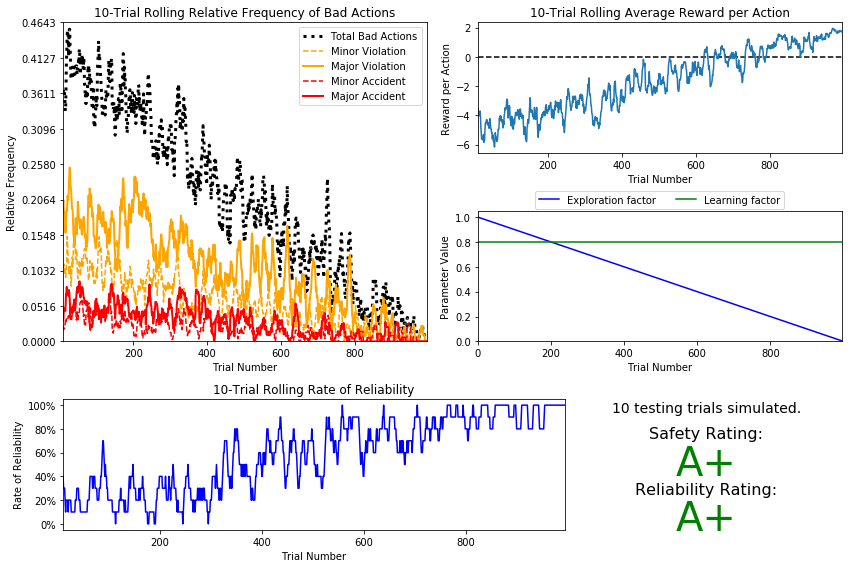

In [34]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

<a id="Q7"></a>
### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
1. The decaying function is (epsilon - 0.001).
2. Around 1000 training before testing starts.
3. The tolerance is set to 0.005 so that we can have more training trials, and the learning rate is set to 0.8, so that it is more likely to converge. 
4. The grade for safety improves from D to A+, and at the meantime the rate of reliability improves from F to A+.
5. Based on the grade the agent receives, it is fare to say that it already learns quite well on the appropriate policies.
6. I will say this training is quite successful and the result is very satisfactory.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

<a id="Q8"></a>
### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

1. The optimal policy will be (based on the knowledge we have on US traffic rules): 
    - A. when the light is red, choose right only when the waypoint is right and left is not forwards.
    - B. when the light is green, choose right when the waypoint is right.
    - C. when the light is green, choose left when the waypoint is left and the oncoming traffic is not forwards.
    - D. when the light is green, choose forwards when the waypoint is forwards.
2. With the first 3 examples as below, overall speaking, the policy being learned goes quite consistent to the optimal policy.<br/>
    
    **The state dictionary order: waypoint, light, left, oncoming**<br/>
    **example01:**<br/>
    ('left', 'green', 'forward', 'left')
     - None : -4.86
     - forward : 0.21
     - right : 0.72
     - left : 2.75<br/>
    ** this echos the optimal policy C.**
    
    **example02:**<br/>
    ('right', 'green', 'forward', 'right')
     - None : -4.55
     - forward : 0.20
     - right : 1.35
     - left : -19.66<br/>
    ** this echos the optimal policy B.**
    
    **example03:**<br/>
    ('left', 'red', 'right', 'left')
     - None : 1.75
     - forward : -9.92
     - right : 0.71
     - left : -10.65<br/>
    ** this echos the optimal policy A.**

3. The sub-optimal policy example as below:<br/>
    ** sub-optimal policy**

    ('left', 'green', 'right', 'forward')
     - None : -5.12
     - forward : 1.06
     - right : 0.28
     - left : -18.48

    In this case, the agent should stay as None, but in the policy described above, it is going forwards.

4. If the agent has not completely searched through all possible state and action space, and learn the positive and negative reward for every corresponding state action match, then maybe the agent will choose sub-optimal policy which goes against to our understanding for the US traffic laws. 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

<a id="Q9"></a>
### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
1. Regarding the environment, for every step, the agent faces different condition, as we know the future reward will orient the agent to learn the optimal policy under the condition that on every step the agent faces the same condition. However, this is not applicable in this case. Hence it provides not so much value to include future rewards.
2. Regarding the agent itself, for every trial, the agent will start and end in different location, therefore it is not useful for us to include the future reward as well. The top priority of this learning process to equit the agent the correct way of driving, instead of learning how to reach the destination as soon as possible. Including future reward will create bias for the agent to come up with sub-optimal or even bad policy. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.